In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [2]:
bike_sharing_data = pd.read_csv('datasets/day.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_sharing_data.shape

(731, 16)

In [4]:
# Workingday and Temperature on number of bikes rented is significant 
# or not
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike_sharing_data_cols = bike_sharing_data[['season', 'mnth', 'holiday',
       'workingday', 'weathersit', 'temp', 'cnt']]

In [6]:
# saving into a csv file
bike_sharing_data_cols.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [7]:
bike_sharing_data_cols.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [8]:
bike_sharing_data_cols.describe()

,season,mnth,holiday,workingday,weathersit,temp,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,0.683995,1.395349,0.495385,4504.348837
std,1.110807,3.451913,0.167155,0.465233,0.544894,0.183051,1937.211452
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.059130,22.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.337083,3152.000000
50%,3.000000,7.000000,0.000000,1.000000,1.000000,0.498333,4548.000000
75%,3.000000,10.000000,0.000000,1.000000,2.000000,0.655417,5956.000000
max,4.000000,12.000000,1.000000,1.000000,3.000000,0.861667,8714.000000


In [9]:
bike_sharing_data_cols['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
bike_sharing_data_cols['season'].unique()

array([1, 2, 3, 4])

In [11]:
bike_sharing_data_cols['holiday'].unique()

array([0, 1])

In [12]:
bike_sharing_data_cols['workingday'].unique()

array([0, 1])

In [13]:
bike_sharing_data_cols['temp'].unique()

array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.415    ,
       0.266087 , 0.318261 , 0.435833 , 0.521667 , 0.399167 , 0.285217 ,
       0.303333 , 0.182222 , 0.221739 , 0.295652 , 0.364348 , 0.2825   ,
       0.343478 , 0.407273 , 0.266667 , 0.335    , 0.198333 , 0.384167 ,
       0.376522 , 0.261739 , 0.2925   , 0.295833 , 0.389091 , 0.329167 ,
       0.384348 , 0.325217 , 0.317391 , 0.365217 , 0.54     , 0.4725   ,
       0.3325   , 0.430435 , 0.441667 , 0.346957 , 0.285    , 0.264167 ,
       0.265833 , 0.253043 , 0.264348 , 0.3025   , 

In [14]:
bike_sharing_data_cols['weathersit'].unique()

array([2, 1, 3])

In [15]:
bike_sharing_data_cols['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [16]:
 bike_sharing_data_cols.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

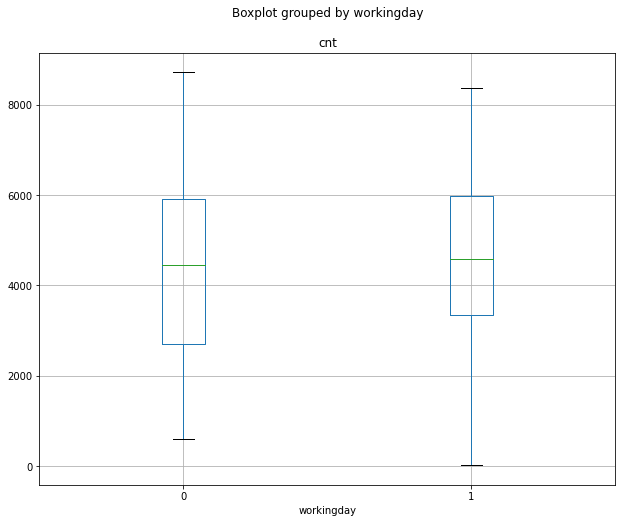

In [17]:
bike_sharing_data_cols.boxplot(column=['cnt'], by='workingday', figsize=(10,8))

In [18]:
# for working day
sample_01 = bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 1)]

# for non-working day
sample_02 = bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 0)]

In [19]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [20]:
bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 1)]

,season,mnth,holiday,workingday,weathersit,temp,cnt
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600
5,1,1,0,1,1,0.204348,1606
6,1,1,0,1,2,0.196522,1510
...,...,...,...,...,...,...,...
723,1,12,0,1,2,0.231304,920
725,1,12,0,1,3,0.243333,441
726,1,12,0,1,2,0.254167,2114
727,1,12,0,1,2,0.253333,3095


In [21]:
bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 0)]

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
7,1,1,0,0,2,0.165000,959
8,1,1,0,0,1,0.138333,822
14,1,1,0,0,2,0.233333,1248
...,...,...,...,...,...,...,...
721,1,12,0,0,1,0.265833,1749
722,1,12,0,0,1,0.245833,1787
724,1,12,1,0,2,0.291304,1013
728,1,12,0,0,2,0.253333,1341


In [22]:
sample_01 = sample_01.sample(231)

In [23]:
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

Leven's test to check whether the **variance** of the two groups are the same, like the t-test but for **variance** rather than the mean

In [24]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=2.5393511733725656, pvalue=0.111727259830027)

In [25]:
scale(np.array(sample_01['cnt']))

array([-1.32492406, -0.04712871,  0.08447148, -0.00467703, -1.72609237,
        0.4187784 ,  1.51774609, -0.66055538,  0.12851509,  0.46918976,
       -0.18668858, -0.0874578 ,  1.50447994, -0.27636774, -1.49048559,
       -0.74652002, -0.54646651,  1.14417136,  0.33122183, -0.14476756,
        0.45539297, -0.6642699 ,  0.12267798,  0.46865912, -1.58706314,
       -0.99857683,  1.62334462, -1.37798865, -1.77915696,  0.21925554,
        1.21633921, -0.7613781 , -0.61067467,  1.60105749,  1.09322936,
        0.20598939, -0.30767585,  0.10198279, -1.80993443,  0.16512966,
        0.23411363,  0.84860159,  0.86080645, -0.48119706, -0.85211856,
       -0.28963389, -1.4039903 , -0.5024229 , -0.25885643, -1.19385452,
        1.23331988, -1.7287456 , -0.29387906,  0.63740452, -1.73405206,
        1.51986867,  1.49652025, -0.11452074, -0.36710819,  0.50898821,
       -0.15697241,  1.38402332,  0.34448797, -1.70486654, -1.1185028 ,
        1.6127317 , -0.46103252,  0.45857685,  1.5872607 ,  1.37

In [26]:
scale(np.array(sample_02['cnt'], dtype = np.float))

array([-1.63362686e+00, -1.72348401e+00, -1.64632406e+00, -1.71322857e+00,
       -1.50518973e+00, -1.52667731e+00, -1.62630154e+00, -1.63558027e+00,
       -1.63313850e+00, -1.57844284e+00, -1.57941955e+00, -1.62385977e+00,
       -1.32205695e+00, -1.39579842e+00, -1.33866099e+00, -1.31619670e+00,
       -1.22975803e+00, -1.57404766e+00, -1.15308644e+00, -9.41629121e-01,
       -1.10034420e+00, -1.81920141e+00, -1.07348472e+00, -9.34303810e-01,
       -5.92455952e-01, -9.07932689e-01, -8.95723837e-01, -1.28787217e+00,
       -1.01488223e+00, -5.27993213e-01, -9.15746354e-01, -7.00870558e-01,
       -5.88060765e-01, -1.72641413e+00, -2.86257942e-01, -1.43658550e-01,
       -6.79636669e-02,  4.79481260e-01, -4.78181096e-01,  1.87445518e-01,
        1.38261286e-03, -4.49856560e-01,  1.08820511e-01,  7.20239823e-01,
        1.61074398e-01,  2.08933098e-01,  2.23583720e-01, -1.13380597e-01,
        4.94131882e-01,  2.81209502e-01,  3.10510747e-01,  6.34035814e-02,
        3.85228922e-01,  

The distribution of the residuals between the two groups should follow the **normal** distribution

In [27]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))
print(diff)

[ 3.15817081e-01  1.28074084e+00  1.31424514e+00  1.30270477e+00
 -6.35260168e-02  1.45756907e+00  2.30448325e+00  7.83388161e-01
  1.33509225e+00  1.53239534e+00  1.07301420e+00  1.17650525e+00
  2.06325231e+00  8.70127063e-01 -2.51822101e-02  4.79615867e-01
  5.54069860e-01  2.00257231e+00  1.11135800e+00  6.16238945e-01
  1.15826402e+00  9.20755779e-01  9.04375900e-01  1.04099898e+00
 -6.61763856e-01 -8.43006149e-03  1.82164910e+00  1.50229465e-02
 -4.74512062e-01  5.56303480e-01  1.55138111e+00  1.32147781e-04
  1.98624561e-02  2.43924498e+00  9.85158484e-01  2.54020266e-01
 -1.64038908e-01 -2.93961127e-01 -9.05228415e-01 -2.70435599e-02
  1.63186394e-01  9.38252468e-01  5.20937833e-01 -8.86614916e-01
 -7.20582511e-01 -3.62458801e-01 -1.15539383e+00 -2.66040879e-01
 -5.58272804e-01 -1.05190278e+00  6.28523854e-01 -1.26111850e+00
 -4.99826419e-01  2.93108613e-01 -1.54106552e+00  7.03350118e-01
  7.56212453e-01 -1.99032285e-01 -8.95177126e-01 -1.73645407e-02
 -3.15180515e-01  3.77986

(array([ 2.,  8., 15., 29., 39., 46., 41., 36., 10.,  5.]),
 array([-2.88533238, -2.35287464, -1.8204169 , -1.28795917, -0.75550143,
        -0.2230437 ,  0.30941404,  0.84187177,  1.37432951,  1.90678724,
         2.43924498]),
 <BarContainer object of 10 artists>)

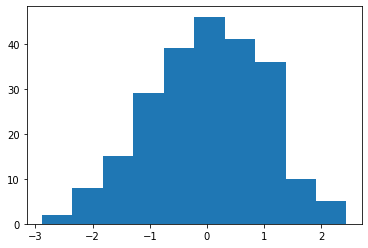

In [28]:
plt.hist(diff)

Generating a probability plot of **sample data** against the quantiles of a **theoretical distribution**

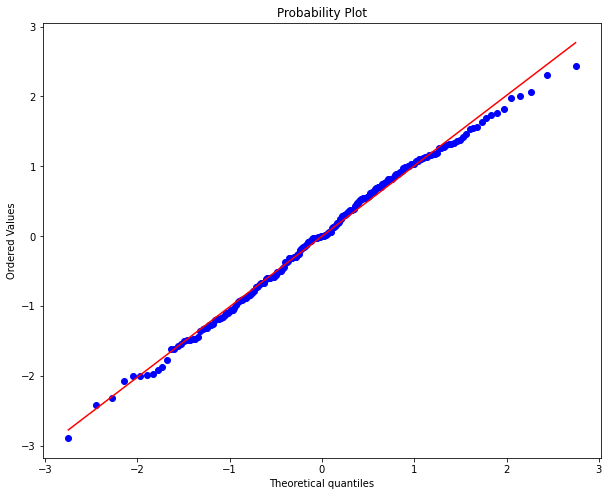

In [29]:
plt.figure(figsize=(10,8))
stats.probplot(diff, plot=plt, dist='norm')
plt.show()

This shows our data is normalized, although, at two ends the data does not exactly fit the **red line**

Another method to check for the normality is to use the Shapiro-Wilk test for normality. 
- If the test statistic is **not significant** then population is **normally distributed**

In [30]:
stats.shapiro(diff)

(0.9943041801452637, 0.5341091156005859)

Here the p-value is 0.31426 i.e., is 31% which means the Shapirop test is not significant and our residual data is normally distributed

<h3> Performing an independent T-test</h3

In [31]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.87275393097813, pvalue=0.06173642682628088)

The p-value here is 0.14587637383743718 (which is > 0.05), so we can accept the null hypothesis (H0) and reject the alternative hypothesis.

This illustrates that, whether it is a working day or not, this has no effect on the number of bikes shared.

In [32]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

Comparing the number of bikes shared on **working day vs non-working day** for equal number of data 

In [33]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4673.813853,1888.588103,124.259974,4428.980477,4918.647228
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4501.991342,1977.416322,91.997733,4321.204461,4682.778223


In [34]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   343.6450
1      Degrees of freedom =   460.0000
2                       t =     1.8728
3   Two side test p value =     0.0617
4  Difference < 0 p value =     0.9691
5  Difference > 0 p value =     0.0309
6               Cohen's d =     0.1743
7               Hedge's g =     0.1740
8           Glass's delta =     0.1820
9             Pearson's r =     0.0870


Therefore, the number of bikes shared is not impacted by working day or not working day.

In [35]:
bike_sharing_data_cols.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


Box plot visualization of 'temp' column. 

<AxesSubplot:>

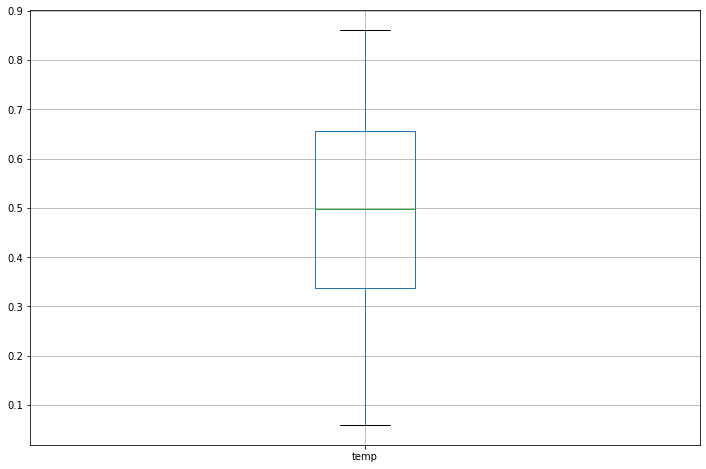

In [36]:
bike_sharing_data_cols[['temp']].boxplot(figsize=(12, 8))

The median temperature is around 0.5 and the minimum and maximum temperature are in the range 0 to 1.

Now creating a category one for temperature above the median and one below the median temperature.

In [74]:
bike_sharing_data_cols.drop('temp_category', inplace=True)

/home/bu113t/.local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
bike_sharing_data_cols

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
0,1.0,1.0,0.0,0.0,2.0,0.344167,985.0,0
1,1.0,1.0,0.0,0.0,2.0,0.363478,801.0,0
2,1.0,1.0,0.0,1.0,1.0,0.196364,1349.0,0
3,1.0,1.0,0.0,1.0,1.0,0.200000,1562.0,0
4,1.0,1.0,0.0,1.0,1.0,0.226957,1600.0,0
...,...,...,...,...,...,...,...,...
726,1.0,12.0,0.0,1.0,2.0,0.254167,2114.0,0
727,1.0,12.0,0.0,1.0,2.0,0.253333,3095.0,0
728,1.0,12.0,0.0,0.0,2.0,0.253333,1341.0,0
729,1.0,12.0,0.0,0.0,1.0,0.255833,1796.0,0


In [77]:
bike_sharing_data_cols.columns

Index(['season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'cnt',
       'temp_category'],
      dtype='object')

In [80]:
bike_sharing_data_cols.groupby['temp_category', 'cnt']

TypeError: 'method' object is not subscriptable